# Video 1

## 1. Create directory

In [ ]:
mkdir webpages
cd webpages

## 2. Create a virtual environment for Python 3

In [1]:
virtualenv venv --python=python3
source venv/bin/activate

SyntaxError: invalid syntax (<ipython-input-1-232dbaed871e>, line 1)

## 3. Run the webserver for static page

In [ ]:
cd ros_webpage
python -m http.server

In [ ]:
public_ip

add public_ip + 8000

eg: 3.89.100.224:8000

Click on inspect: some wrong:

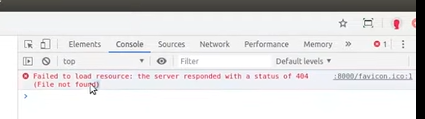

## 4. Run ROSBridge Websocket Server

In [ ]:
roslaunch rosbridge_server rosbridge_websocket.launch

Basic code

In [ ]:
var ros = new ROSLIB.Ros({
    url : 'ws://<IP>:9090'
});

ros.on('connection', function() {
console.log('Connected to websocket server.');
});

ros.on('error', function(error) {
console.log('Error connecting to websocket server: ', error);
});

ros.on('close', function() {
console.log('Connection to websocket server closed.');
});

// Publishing a Topic
// ------------------

var cmdVel = new ROSLIB.Topic({
  ros : ros,
  name : '/cmd_vel',
  messageType : 'geometry_msgs/Twist'
});

var twist = new ROSLIB.Message({
linear : {
  x : 0.5,
  y : 0.0,
  z : 0.0
},
angular : {
  x : 0.3,
  y : 0.0,
  z : 0.0
}
});

console.log("Publishing cmd_vel");
cmdVel.publish(twist);

index.html

In [ ]:
<html>

<head>
	<script type="text/javascript" src="https://static.robotwebtools.org/roslibjs/current/roslib.min.js">

	</script>
</head>

<body>
	<h1>Hello from ROSDS!</h1>

	<p>Communicate to robots from my 1st webpage</p>

	<script type="text/javascript">
		var ros = new ROSLIB.Ros({
            url : 'ws://IP:9090'
        });

        ros.on('connection', function() {
            console.log('Connected to websocket server.');
        });

        ros.on('error', function(error) {
            console.log('Error connecting to websocket server: ', error);
        });

        ros.on('close', function() {
            console.log('Connection to websocket server closed.');
        });

        // Publishing a Topic
        // ------------------

        var cmdVel = new ROSLIB.Topic({
            ros : ros,
            name : '/cmd_vel',
            messageType : 'geometry_msgs/Twist'
        });

        var twist = new ROSLIB.Message({
            linear : {
                x : 0.5,
                y : 0.0,
                z : 0.0
            },
            angular : {
                x : 0.0,
                y : 0.0,
                z : 0.5
            }
        });

        console.log("Publishing cmd_vel");
        cmdVel.publish(twist);
	</script>
</body>

</html>

5. check ip cmd_vel is a topic or not

In [ ]:
rostopic list
rostopic type /cmd_vel

In [ ]:
rosmsg show geometry_msgs/Twist

In [ ]:
rostopic echo /cmd_vel

No error for the page:

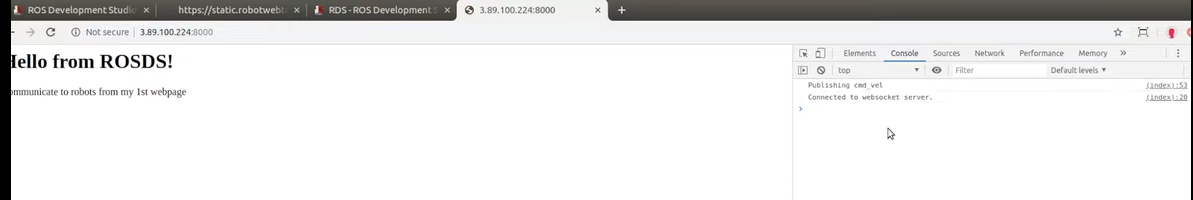

# Video 2

## 1. Run web server

In [ ]:
source ~/venv/bin/activate
cd webpages
python -m http.server

=> port 8000

## 2. Customize web page to have some styles and a javascript framework

In [ ]:
roslaunch rosbridge_server rosbridge_websocket.launch

index.html

In [ ]:
<html>

<head>
    <title>My first web page for ROS!</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css"
        integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">

    <script src="https://cdn.jsdelivr.net/npm/vue">
    </script>
</head>

<body>
    <div id="app" class="container">
        <div class="jumbotron">
            <h1>Hello from ROS!</h1>
        </div>

        <div class="row" style="max-height:200px;">
            <div class="col-md-6">
                <h3>Conenction status</h3>
                <p class="text-danger">Not connected</p>
                <label>Websocket server address</label>
                <input type="text" />
                <br />
                <button>Connect!</button>
            </div>
            <div class="col-md-6" style="max-height: 200px; overflow:auto">
                <h3>Log messages</h3>
            </div>
        </div>
    </div>

    <script type="text/javascript" src="main.js"></script>
</body>

</html>

main.js

In [ ]:
var app = new Vue({
    el: '#app',

    data:{
        connected: false,
        ros: null,
        ws_address: ''
    },

    methods: {
        connect: function(){
            console.log('connect to rosbridge server!!')
            this.ros = new ROSLIB.Ros({
                url: this.ws_address
            })
            this.ros.on('connection', () => {
                console.log('Connected!')
            })
            this.ros.on('error', (error) => {
                console.log('Error connecting to websocket server: ', error)
            })
            this.ros.on('close', () => {
                console.log('Connection to sebsocket server closed.')
            })
        }
    }
})

check public ip

In [ ]:
public_ip
public_ip:8000

replace ws_address in main.js = public_ip + 9090

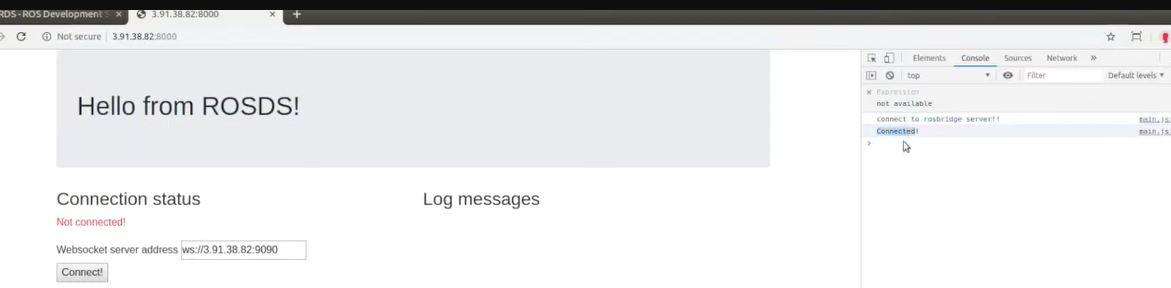

# Video 3: Building a web joystick to control the robot

##1. activate enviroment

In [ ]:
source venv/bin/activate
cd webpages
python -m http.server

port on 8000

##2. check ip

not work in venv

In [ ]:
public_ip (no in venv)

54.91.44.26

##3. go to web

open web.

go to 54.91.44.26:8000

##4. roslaunch

In [ ]:
roslaunch rosbridge_server rosbridge_websocket.launch

on port: 9090

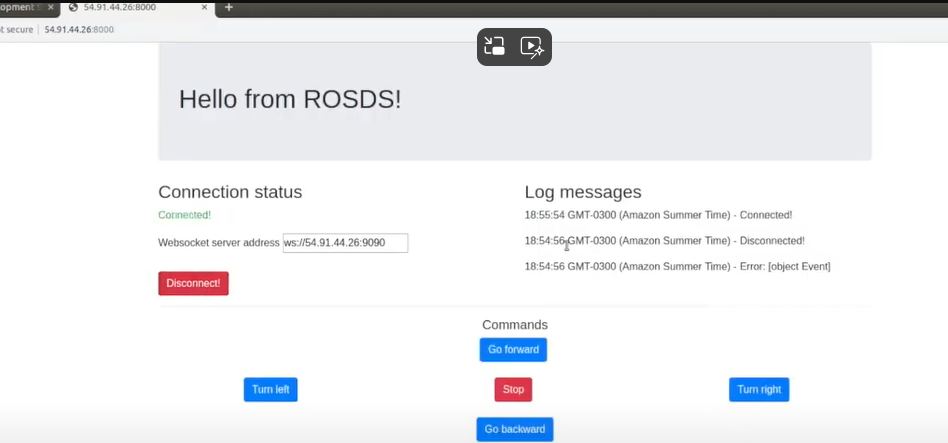

##5. Connect to gazebo

check rostopic:

if clock and cmd_vel is in rostopic or not

In [ ]:
rostopic list

In [ ]:
rostopic info /cmd_vel

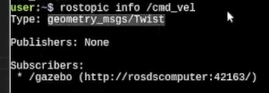

In [ ]:
rosmsg show geometry_msgs/Twist

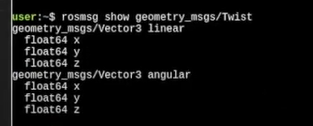